# **🚀Machine Learning Model Implementation: COVID-19 Excess Deaths**

**Objective:** This notebook serves as a comprehensive workshop to train, evaluate, and compare various machine learning models for the WHO COVID-19 Excess Deaths dataset. The goal is to identify the best-performing models for three distinct tasks: Regression, Classification, and Clustering.

## **Name: Pratham Agrawal**
## **PRN: 22070521078**
## **Sem: VII C**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

# Set plot style
sns.set_style('whitegrid')
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the dataset
try:
    df = pd.read_csv('cleaned_who_excess_deaths.csv')
    print("Dataset 'cleaned_who_excess_deaths.csv' loaded successfully.")
except FileNotFoundError:
    print("\n!!! ERROR !!!")
    print("'cleaned_who_excess_deaths.csv' not found. Please upload it to the Colab session storage.")
    df = None

if df is not None:
    # Create the 'risk_level' target column for later classification tasks
    qt = QuantileTransformer(output_distribution='uniform', n_quantiles=4)
    df['risk_level_q'] = qt.fit_transform(df[['excessmean']])
    bin_labels = ['Low', 'Medium', 'High', 'Critical']
    df['risk_level'] = pd.cut(df['risk_level_q'], bins=4, labels=bin_labels, include_lowest=True)
    print("\n'risk_level' column created for later use.")

    # Display the first few rows of the prepared data
    display(df.head())

Dataset 'cleaned_who_excess_deaths.csv' loaded successfully.

'risk_level' column created for later use.


,country,iso3,year,sex,age_group,type,expectedmean,acmmean,excessmean,risk_level_q,risk_level
0,Afghanistan,AFG,2020,Female,0-24,predicted,49083.643934,49103.143153,0.000000,0.333320,Medium
1,Afghanistan,AFG,2020,Female,25-34,predicted,6452.967039,6691.247219,236.607817,0.513873,High
2,Afghanistan,AFG,2020,Female,35-44,predicted,6117.873106,6977.363939,860.300714,0.666908,High
3,Afghanistan,AFG,2020,Female,45-54,predicted,7711.689531,9330.217317,1621.571806,0.667340,High
4,Afghanistan,AFG,2020,Female,55-64,predicted,10061.544157,12457.985086,2401.488971,0.667781,High


# **Part A: Regression Models**

**Objective:** To predict the exact numerical value of `excessmean` (the number of excess deaths) based on a country, year, sex, and age group.

In [3]:
# Define features and the regression target variable
features = ['country', 'sex', 'age_group', 'year']
target_reg = 'excessmean'

X = df[features]
y_reg = df[target_reg]

# Split the data into training and testing sets
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Create a preprocessing pipeline to handle our categorical features
# We use OneHotEncoder to turn text categories into numerical format
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)],
    remainder='passthrough'
)

print(f"Data prepared for regression. Training set has {X_train.shape[0]} samples.")

Data prepared for regression. Training set has 4966 samples.


## **Model 1A: Simple Linear Regression**
**Why we are applying this model:**
A Simple Linear Regression helps us isolate the predictive power of a **single feature**. Our original features are all categorical, so to do this properly, we first need to convert one of them into a meaningful numerical scale. We will convert `age_group` into an ordered numerical feature.

The goal is to answer the question: "If we only knew the age group, how well could we predict the excess deaths?" This provides a very clear, focused baseline and helps us understand the isolated impact of age.

Training the Simple Linear Regression model (on age group only)...
Training complete.

--- Evaluation Metrics for Simple Linear Regression ---
R-squared (R²): 0.0055
Mean Absolute Error (MAE): 4,078.98
Mean Squared Error (MSE): 481,254,776.18
Root Mean Squared Error (RMSE): 21,937.52


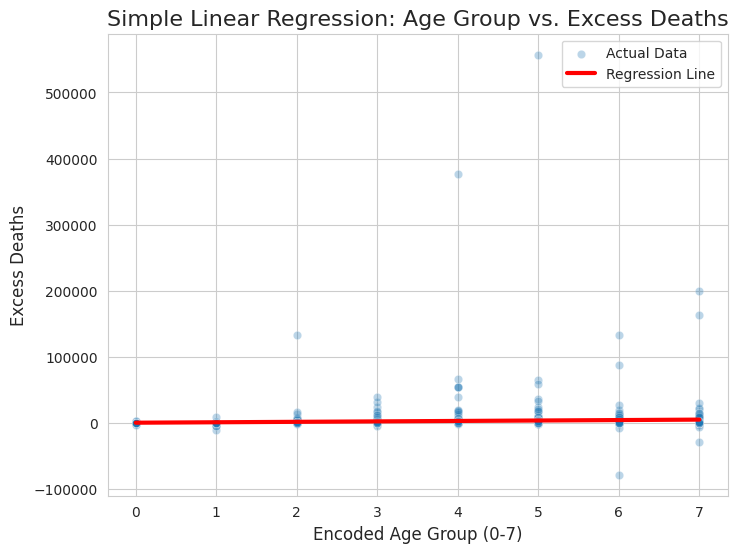

In [4]:
# To perform a Simple Linear Regression, we need a single numerical input feature.
# Let's create an ordered numerical representation of our 'age_group' category.

# Define the order of the age groups
age_order = ['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85']
# Create a mapping from category to number
age_mapping = {age: i for i, age in enumerate(age_order)}

# Create the new numerical feature
X_train_simple = X_train['age_group'].map(age_mapping).to_frame()
X_test_simple = X_test['age_group'].map(age_mapping).to_frame()

# --- Train the Simple Linear Regression Model ---
print("Training the Simple Linear Regression model (on age group only)...")
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train_simple, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_simple_lr = simple_lr_model.predict(X_test_simple)
r2_simple_lr = r2_score(y_reg_test, y_pred_simple_lr)
mae_simple_lr = mean_absolute_error(y_reg_test, y_pred_simple_lr)
mse_simple_lr = mean_squared_error(y_reg_test, y_pred_simple_lr)
rmse_simple_lr = np.sqrt(mse_simple_lr)

print("\n--- Evaluation Metrics for Simple Linear Regression ---")
print(f"R-squared (R²): {r2_simple_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_simple_lr:,.2f}")
print(f"Mean Squared Error (MSE): {mse_simple_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple_lr:,.2f}")

# --- Visualization ---
plt.figure(figsize=(8, 6))
# Plot the actual data points
sns.scatterplot(x=X_test_simple['age_group'], y=y_reg_test, alpha=0.3, label='Actual Data')
# Plot the regression line
sns.lineplot(x=X_test_simple['age_group'], y=y_pred_simple_lr, color='red', lw=3, label='Regression Line')
plt.title('Simple Linear Regression: Age Group vs. Excess Deaths', fontsize=16)
plt.xlabel('Encoded Age Group (0-7)', fontsize=12)
plt.ylabel('Excess Deaths', fontsize=12)
plt.legend()
plt.show()

## **Model 1B: Multiple Linear Regression with Backward Elimination**
**Why we are applying this model:**
Our first Multiple Linear Regression model used **all** available features (hundreds after one-hot encoding). But are all of them statistically significant? Probably not.

**Backward Elimination** is a feature selection technique that helps us build a simpler, more interpretable model. It starts with all features and systematically removes the least useful one, step-by-step, until only statistically significant features remain.

We are applying this to find the **most impactful predictors** of `excessmean`. The final model will be less complex and will only contain the variables that have a proven, significant effect on the outcome. For this, we will use the `statsmodels` library, which is ideal for this kind of statistical analysis.

In [5]:
# For detailed statistical analysis like p-values, the statsmodels library is better than scikit-learn.
import statsmodels.api as sm

# First, we need to manually one-hot encode our data using pandas
# --- FIX APPLIED HERE --- We add .astype(int) to ensure all columns are numerical (1/0)
X_train_encoded = pd.get_dummies(X_train, columns=features, drop_first=True).astype(int)
X_test_encoded = pd.get_dummies(X_test, columns=features, drop_first=True).astype(int)


# Align columns - crucial for making sure test set has same columns as train set
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_cols] # Ensure order is the same

# Add a constant (the intercept) to our model
X_train_sm = sm.add_constant(X_train_encoded)
X_test_sm = sm.add_constant(X_test_encoded)


# --- Backward Elimination Logic ---
print("Starting Backward Elimination...")
features_to_keep = list(X_train_sm.columns)
significance_level = 0.05
iterations = 0

# Limit iterations to prevent infinite loops in edge cases
max_iterations = len(features_to_keep)

while len(features_to_keep) > 1 and iterations < max_iterations:
    iterations += 1

    # Fit the model with the current set of features
    model_be = sm.OLS(y_reg_train, X_train_sm[features_to_keep]).fit()

    # Get the p-values for each feature
    p_values = model_be.pvalues

    # Find the feature with the highest p-value (that is not the constant)
    p_values_without_const = p_values.drop('const', errors='ignore')
    if p_values_without_const.empty:
        break # Stop if only const is left

    max_p_value = p_values_without_const.max()
    feature_with_max_p = p_values_without_const.idxmax()

    # If the highest p-value is above our significance level, remove the feature
    if max_p_value > significance_level:
        print(f"Removing feature '{feature_with_max_p}' with p-value {max_p_value:.4f}")
        features_to_keep.remove(feature_with_max_p)
    else:
        # Otherwise, all remaining features are significant, so we stop
        print("\nAll remaining features are statistically significant. Stopping.")
        break

print("\nBackward Elimination Complete.")
print(f"Number of optimal features found: {len(features_to_keep)}")

# --- Final Model with Selected Features ---
# Train the final OLS model using only the significant features
final_model = sm.OLS(y_reg_train, X_train_sm[features_to_keep]).fit()

# Display the detailed summary of the final, optimized model
print("\n--- Summary of Final Multiple Linear Regression Model (with Backward Elimination) ---")
print(final_model.summary())

Starting Backward Elimination...
Removing feature 'country_Bolivia (Plurinational State of)' with p-value 0.9718
Removing feature 'country_Ecuador' with p-value 0.9841
Removing feature 'country_France' with p-value 0.9856
Removing feature 'country_Thailand' with p-value 0.9537
Removing feature 'country_Kazakhstan' with p-value 0.9216
Removing feature 'age_group_25-34' with p-value 0.9182
Removing feature 'country_Germany' with p-value 0.8536
Removing feature 'country_Algeria' with p-value 0.7779
Removing feature 'country_Bulgaria' with p-value 0.7769
Removing feature 'country_Serbia' with p-value 0.7997
Removing feature 'country_Nigeria' with p-value 0.8132
Removing feature 'country_Morocco' with p-value 0.8150
Removing feature 'country_Democratic Republic of the Congo' with p-value 0.8232
Removing feature 'country_Myanmar' with p-value 0.8070
Removing feature 'country_Ethiopia' with p-value 0.8134
Removing feature 'country_Iraq' with p-value 0.8174
Removing feature 'country_Belarus' w

## **Model 1C: Linear Regression Normal**
**Why we are applying this model:**
This model serves as our **common-sense baseline**. We are using it to check for a simple, straight-line relationship between our features (`country`, `age_group`, etc.) and the number of excess deaths. Its performance will be the benchmark that all more complex models must improve upon.

In [6]:
# Create a full pipeline including the preprocessor and the Linear Regression model
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model on the training data
print("Training the Linear Regression model...")
pipeline_lr.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions on the test data
y_pred_lr = pipeline_lr.predict(X_test)

Training the Linear Regression model...
Training complete.


--- Evaluation Metrics for Linear Regression ---
R-squared (R²): 0.4614
Mean Absolute Error (MAE): 3,318.10
Mean Squared Error (MSE): 260,633,844.53
Root Mean Squared Error (RMSE): 16,144.16

*R² tells us the proportion of variance in the excess deaths that is predictable from the features.
*MAE tells us, on average, how far off our predictions are from the actual number of deaths.
*RMSE is similar to MAE but gives a higher weight to large errors.


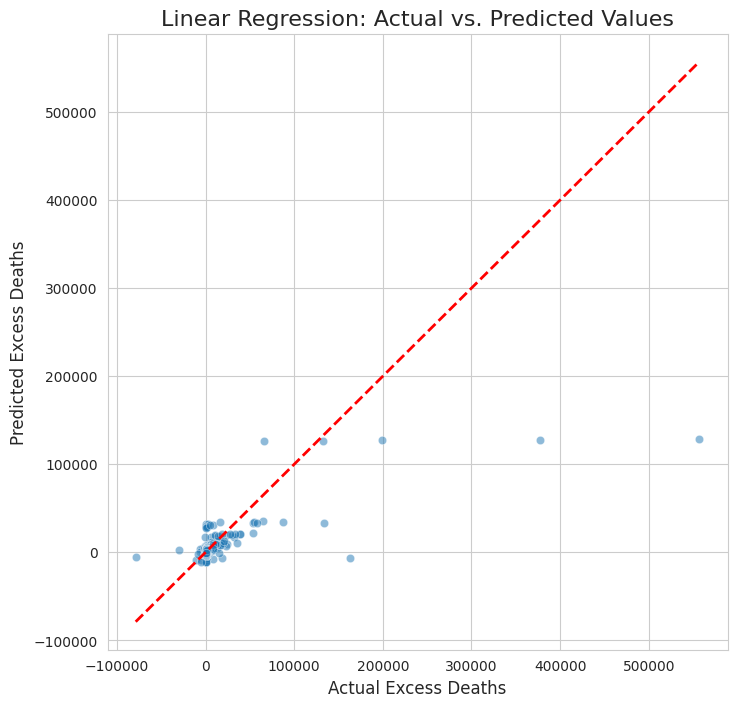

In [7]:
# Calculate evaluation metrics
r2_lr = r2_score(y_reg_test, y_pred_lr)
mae_lr = mean_absolute_error(y_reg_test, y_pred_lr)
mse_lr = mean_squared_error(y_reg_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Print the evaluation metrics
print("--- Evaluation Metrics for Linear Regression ---")
print(f"R-squared (R²): {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:,.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:,.2f}")

print("\n*R² tells us the proportion of variance in the excess deaths that is predictable from the features.")
print("*MAE tells us, on average, how far off our predictions are from the actual number of deaths.")
print("*RMSE is similar to MAE but gives a higher weight to large errors.")

# --- Visualization: Actual vs. Predicted Values ---
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_reg_test, y=y_pred_lr, alpha=0.5)
# Add a line for perfect predictions (y=x)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Excess Deaths', fontsize=12)
plt.ylabel('Predicted Excess Deaths', fontsize=12)
plt.show()

## **Models 2 & 3: Ridge & Lasso Regression**
**Why we are applying these models:**
These are improved versions of Linear Regression. Our `country` feature has almost 200 unique values, which creates a very large number of features after one-hot encoding.

* **Ridge Regression:** This model helps prevent overfitting by penalizing large coefficients, leading to a more stable and reliable model when many features are present.
* **Lasso Regression:** This model goes a step further and can shrink the coefficients of less important features to exactly zero. This is extremely useful for our dataset as it performs **automatic feature selection**, helping us identify which specific countries or age groups are the most significant predictors of excess deaths.

In [8]:
# Import the Ridge and Lasso models
from sklearn.linear_model import Ridge, Lasso

In [9]:
# --- Ridge Regression ---
# Create the pipeline
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])

# Train the model
print("Training the Ridge Regression model...")
pipeline_ridge.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_ridge = pipeline_ridge.predict(X_test)
r2_ridge = r2_score(y_reg_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_reg_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_reg_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("\n--- Evaluation Metrics for Ridge Regression ---")
print(f"R-squared (R²): {r2_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:,.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:,.2f}")


print("\n" + "="*50 + "\n") # Separator


# --- Lasso Regression ---
# Create the pipeline
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=42))
])

# Train the model
print("Training the Lasso Regression model...")
pipeline_lasso.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_lasso = pipeline_lasso.predict(X_test)
r2_lasso = r2_score(y_reg_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_reg_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_reg_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("\n--- Evaluation Metrics for Lasso Regression ---")
print(f"R-squared (R²): {r2_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:,.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:,.2f}")

Training the Ridge Regression model...
Training complete.

--- Evaluation Metrics for Ridge Regression ---
R-squared (R²): 0.4512
Mean Absolute Error (MAE): 3,314.15
Mean Squared Error (MSE): 265,540,549.31
Root Mean Squared Error (RMSE): 16,295.41


Training the Lasso Regression model...
Training complete.

--- Evaluation Metrics for Lasso Regression ---
R-squared (R²): 0.4612
Mean Absolute Error (MAE): 3,299.87
Mean Squared Error (MSE): 260,724,395.35
Root Mean Squared Error (RMSE): 16,146.96


## **Model 4: K-Neighbors Regressor**
**Why we are applying this model:**
This model operates on a principle of similarity, also known as an "instance-based" or "lazy learning" approach. It predicts the excess deaths for a given demographic group by looking at the average outcomes of the 'K' most similar groups (the "nearest neighbors") from the training data.

We apply it to our dataset to test a non-linear hypothesis: that the mortality figures for a group like "Females, 45-54, in Germany" can be effectively estimated by averaging the known outcomes of very similar groups, such as "Females, 45-54, in Austria" or "Females, 55-64, in Germany."

In [10]:
# Import the K-Neighbors Regressor model
from sklearn.neighbors import KNeighborsRegressor

In [11]:
# Create the pipeline
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Train the model
print("Training the K-Neighbors Regressor model...")
pipeline_knn.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_knn = pipeline_knn.predict(X_test)
r2_knn = r2_score(y_reg_test, y_pred_knn)
mae_knn = mean_absolute_error(y_reg_test, y_pred_knn)
mse_knn = mean_squared_error(y_reg_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn) # New metric

print("\n--- Evaluation Metrics for K-Neighbors Regressor ---")
print(f"R-squared (R²): {r2_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:,.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:,.2f}")

Training the K-Neighbors Regressor model...
Training complete.

--- Evaluation Metrics for K-Neighbors Regressor ---
R-squared (R²): -0.0027
Mean Absolute Error (MAE): 3,841.26
Mean Squared Error (MSE): 485,179,190.25
Root Mean Squared Error (RMSE): 22,026.78


## **Model 5: Decision Tree Regressor**
**Why we are applying this model:**
The primary advantage of a Decision Tree is its **interpretability**. Unlike the previous "black box" models, this one creates a set of simple, flowchart-like "if-then" rules that are easy for humans to understand.

We are applying it to our dataset to see if we can create an understandable model that explains *how* it arrives at a prediction. For example, it might learn a rule like *"IF `age_group` is '>85' AND `country` is 'Peru', THEN predict `excessmean` = 12,000"*. While it may not be the most accurate model, its transparency is highly valuable for explaining the key factors driving mortality.

In [12]:
# Import the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Create the pipeline
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
print("Training the Decision Tree Regressor model...")
pipeline_dt.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_dt = pipeline_dt.predict(X_test)
r2_dt = r2_score(y_reg_test, y_pred_dt)
mae_dt = mean_absolute_error(y_reg_test, y_pred_dt)
mse_dt = mean_squared_error(y_reg_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("\n--- Evaluation Metrics for Decision Tree Regressor ---")
print(f"R-squared (R²): {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:,.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:,.2f}")

Training the Decision Tree Regressor model...
Training complete.

--- Evaluation Metrics for Decision Tree Regressor ---
R-squared (R²): 0.8598
Mean Absolute Error (MAE): 1,407.98
Mean Squared Error (MSE): 67,848,881.91
Root Mean Squared Error (RMSE): 8,237.04


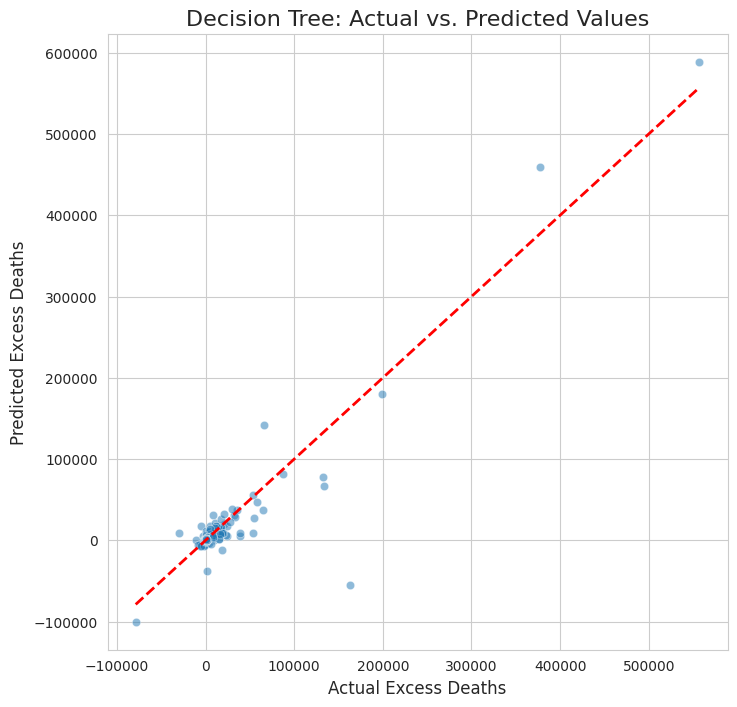

In [14]:
# --- Visualization: Actual vs. Predicted Values ---
# This plot helps us see how well the model's predictions line up with the actual data.
# A perfect model would have all points on the red dashed line.

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_reg_test, y=y_pred_dt, alpha=0.5)
# Add a line for perfect predictions (y=x)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.title('Decision Tree: Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Excess Deaths', fontsize=12)
plt.ylabel('Predicted Excess Deaths', fontsize=12)
plt.show()

## **Model 6: Random Forest Regressor**
**Why we are applying this model:**
A single Decision Tree, while interpretable, is often unstable and prone to overfitting. The Random Forest is a powerful solution to this problem. It's an **ensemble model** that builds hundreds of individual decision trees during training and outputs the average of their predictions.

We apply it to our dataset to achieve **high accuracy** by leveraging the "wisdom of the crowd." By combining many trees, it creates a more robust model that can capture the complex, non-linear interactions between `country`, `age_group`, and `sex` far more effectively than a single tree. This is a strong candidate for our final, most reliable predictive model.

In [15]:
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

In [16]:
# Create the pipeline. n_jobs=-1 uses all available CPU cores to speed up training.
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Train the model
print("Training the Random Forest Regressor model (this may take a moment)...")
pipeline_rf.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_rf = pipeline_rf.predict(X_test)
r2_rf = r2_score(y_reg_test, y_pred_rf)
mae_rf = mean_absolute_error(y_reg_test, y_pred_rf)
mse_rf = mean_squared_error(y_reg_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\n--- Evaluation Metrics for Random Forest Regressor ---")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:,.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:,.2f}")

Training the Random Forest Regressor model (this may take a moment)...
Training complete.

--- Evaluation Metrics for Random Forest Regressor ---
R-squared (R²): 0.8199
Mean Absolute Error (MAE): 1,426.44
Mean Squared Error (MSE): 87,148,804.07
Root Mean Squared Error (RMSE): 9,335.35


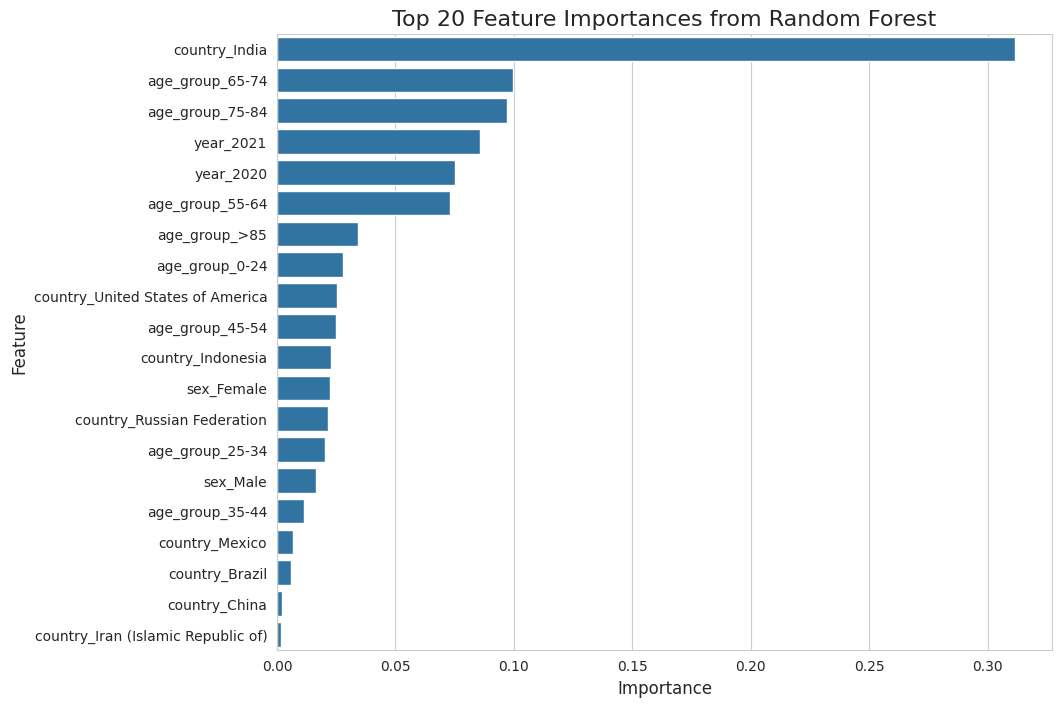

In [17]:
# --- Visualization: Feature Importance ---
# A key benefit of Random Forest is that we can see which features it found most important.

# Extract feature names after one-hot encoding
try:
    feature_names = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(features)
    importances = pipeline_rf.named_steps['regressor'].feature_importances_
    forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    # Plot the top 20 most important features
    plt.figure(figsize=(10, 8))
    sns.barplot(x=forest_importances.head(20), y=forest_importances.head(20).index)
    plt.title('Top 20 Feature Importances from Random Forest', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()

except Exception as e:
    print(f"Could not generate feature importance plot. Error: {e}")

## **Models 7 & 8: Gradient Boosting & XGBoost Regressor**
**Why we are applying these models:**
These models represent the pinnacle of performance for many regression tasks. Unlike Random Forest, which builds many trees independently, Gradient Boosting models build them **sequentially**. Each new tree is trained to correct the errors made by the previous ones.

* **Gradient Boosting:** This is the foundational algorithm. We apply it to see how this sequential error-correction method improves upon the Random Forest's performance.
* **XGBoost (Extreme Gradient Boosting):** This is a highly optimized and powerful implementation of Gradient Boosting, famous for its speed and accuracy. We apply it to our dataset to push for the **highest possible predictive accuracy**, making it a prime candidate for our final, most sophisticated model.

In [18]:
# Import the Gradient Boosting and XGBoost Regressor models
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [19]:
# --- Gradient Boosting Regressor ---
# Create the pipeline
pipeline_gbr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Train the model
print("Training the Gradient Boosting Regressor model...")
pipeline_gbr.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_gbr = pipeline_gbr.predict(X_test)
r2_gbr = r2_score(y_reg_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_reg_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_reg_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print("\n--- Evaluation Metrics for Gradient Boosting Regressor ---")
print(f"R-squared (R²): {r2_gbr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:,.2f}")
print(f"Mean Squared Error (MSE): {mse_gbr:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:,.2f}")


print("\n" + "="*50 + "\n") # Separator


# --- XGBoost Regressor ---
# Create the pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(random_state=42, n_jobs=-1))
])

# Train the model
print("Training the XGBoost Regressor model...")
pipeline_xgb.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_xgb = pipeline_xgb.predict(X_test)
r2_xgb = r2_score(y_reg_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_reg_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_reg_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("\n--- Evaluation Metrics for XGBoost Regressor ---")
print(f"R-squared (R²): {r2_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:,.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:,.2f}")

Training the Gradient Boosting Regressor model...
Training complete.

--- Evaluation Metrics for Gradient Boosting Regressor ---
R-squared (R²): 0.8718
Mean Absolute Error (MAE): 1,993.16
Mean Squared Error (MSE): 62,019,925.16
Root Mean Squared Error (RMSE): 7,875.27


Training the XGBoost Regressor model...
Training complete.

--- Evaluation Metrics for XGBoost Regressor ---
R-squared (R²): 0.8696
Mean Absolute Error (MAE): 1,533.67
Mean Squared Error (MSE): 63,092,815.19
Root Mean Squared Error (RMSE): 7,943.10


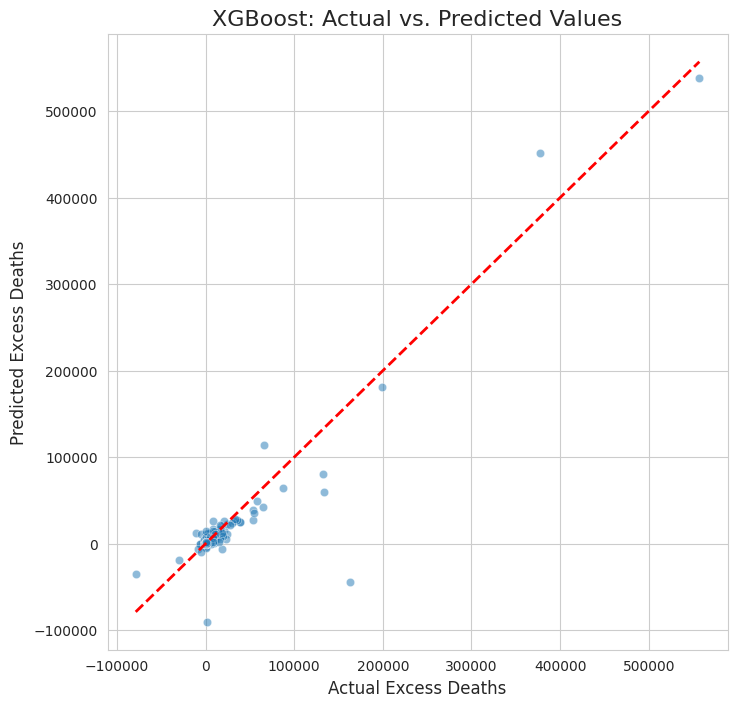

In [20]:
# --- Visualization: Actual vs. Predicted for XGBoost ---
# By plotting this for our best model, we can visually see how much tighter the
# predictions are around the perfect-fit line compared to the baseline Linear Regression.

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_reg_test, y=y_pred_xgb, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.title('XGBoost: Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Excess Deaths', fontsize=12)
plt.ylabel('Predicted Excess Deaths', fontsize=12)
plt.show()

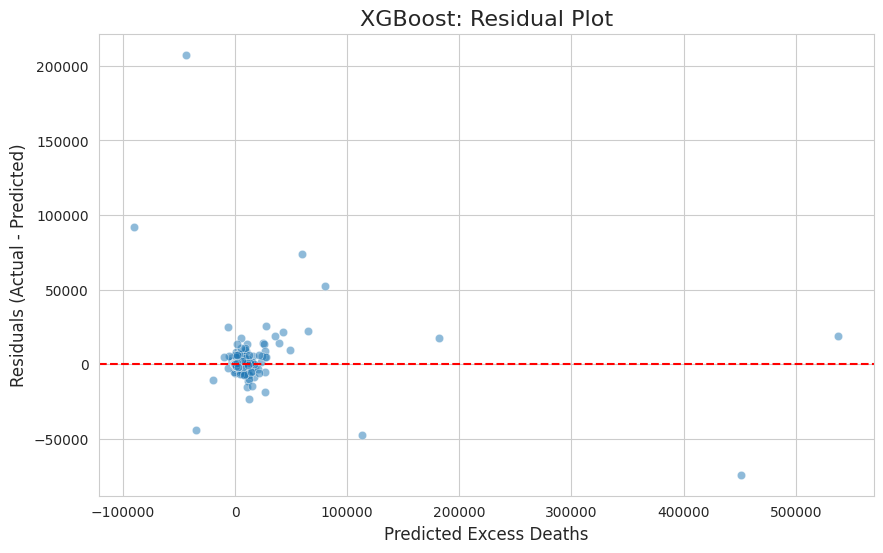

In [21]:
# --- Visualization: Residual Plot for XGBoost ---
# This is a key diagnostic plot. We are looking for a random scatter of points
# around the zero line. If we see a pattern (like a curve), it means our model
# is failing to capture some underlying trend in the data.

residuals = y_reg_test - y_pred_xgb

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # The zero-error line
plt.title('XGBoost: Residual Plot', fontsize=16)
plt.xlabel('Predicted Excess Deaths', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()

## **Model 9: MLP Regressor (Neural Network)**
**Why we are applying this model:**
This is our first **Neural Network**. It attempts to learn the relationships in the data in a way that is inspired by the human brain, using interconnected layers of nodes ("neurons").

We are applying it to our dataset to see if this deep learning approach can capture extremely complex, non-linear, and abstract patterns that even powerful ensemble models like XGBoost might miss. Neural networks are sensitive to the scale of features, so we must scale our data before training. This model represents the most advanced regression technique in our workshop and will be a key point of comparison against the best-performing tree-based models.

In [22]:
# Import the MLP Regressor model
from sklearn.neural_network import MLPRegressor

In [23]:
# --- IMPORTANT: Neural networks require scaled features for good performance ---
# We create a new preprocessor that scales the data after one-hot encoding.
nn_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('scaler', StandardScaler(with_mean=False)) # Use with_mean=False for sparse data
        ]), features)
    ],
    remainder='passthrough'
)

# --- MLP Regressor ---
# Create the pipeline with the special neural network preprocessor
# We define a network with 2 hidden layers of 100 and 50 neurons respectively.
pipeline_mlp = Pipeline(steps=[
    ('preprocessor', nn_preprocessor),
    ('regressor', MLPRegressor(
        random_state=42,
        hidden_layer_sizes=(100, 50),
        max_iter=500,  # Increase iterations for convergence
        alpha=0.001, # Regularization term
        learning_rate_init=0.01, # Controls the step-size in updating the weights
        early_stopping=True # Stop training when validation score is not improving
    ))
])

# Train the model
print("Training the MLP Regressor (Neural Network)...")
pipeline_mlp.fit(X_train, y_reg_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_mlp = pipeline_mlp.predict(X_test)
r2_mlp = r2_score(y_reg_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_reg_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_reg_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

print("\n--- Evaluation Metrics for MLP Regressor ---")
print(f"R-squared (R²): {r2_mlp:.4f}")
print(f"Mean Absolute Error (MAE): {mae_mlp:,.2f}")
print(f"Mean Squared Error (MSE): {mse_mlp:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp:,.2f}")

Training the MLP Regressor (Neural Network)...
Training complete.

--- Evaluation Metrics for MLP Regressor ---
R-squared (R²): 0.3490
Mean Absolute Error (MAE): 2,187.92
Mean Squared Error (MSE): 315,005,113.11
Root Mean Squared Error (RMSE): 17,748.38


## **Results: Regression Model Summary**

In [24]:
# --- Create a summary dataframe for all regression models ---
regression_results = pd.DataFrame({
    'Model': [
        'Simple Linear Regression', 'Multiple Linear Regression', 'Ridge Regression',
        'Lasso Regression', 'K-Neighbors Regressor', 'Decision Tree Regressor',
        'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor',
        'MLP Regressor (Neural Network)'
    ],
    'R-squared (R²)': [
        r2_simple_lr, r2_lr, r2_ridge, r2_lasso, r2_knn, r2_dt,
        r2_rf, r2_gbr, r2_xgb, r2_mlp
    ],
    'Mean Absolute Error (MAE)': [
        mae_simple_lr, mae_lr, mae_ridge, mae_lasso, mae_knn, mae_dt,
        mae_rf, mae_gbr, mae_xgb, mae_mlp
    ],
    'Mean Squared Error (MSE)': [
        mse_simple_lr, mse_lr, mse_ridge, mse_lasso, mse_knn, mse_dt,
        mse_rf, mse_gbr, mse_xgb, mse_mlp
    ],
    'Root Mean Squared Error (RMSE)': [
        rmse_simple_lr, rmse_lr, rmse_ridge, rmse_lasso, rmse_knn, rmse_dt,
        rmse_rf, rmse_gbr, rmse_xgb, rmse_mlp
    ]
}).sort_values(by='R-squared (R²)', ascending=False).reset_index(drop=True)

print("--- Comparative Summary of All Regression Models ---")
display(regression_results)

--- Comparative Summary of All Regression Models ---


,Model,R-squared (R²),Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,Gradient Boosting Regressor,0.871831,1993.155410,6.201993e+07,7875.273022
1,XGBoost Regressor,0.869614,1533.674706,6.309282e+07,7943.098589
2,Decision Tree Regressor,0.859785,1407.981762,6.784888e+07,8237.043275
3,Random Forest Regressor,0.819900,1426.439158,8.714880e+07,9335.352381
4,Multiple Linear Regression,0.461381,3318.101070,2.606338e+08,16144.158217
5,Lasso Regression,0.461193,3299.871331,2.607244e+08,16146.962419
6,Ridge Regression,0.451240,3314.151567,2.655405e+08,16295.414978
7,MLP Regressor (Neural Network),0.349018,2187.924084,3.150051e+08,17748.383394
8,Simple Linear Regression,0.005451,4078.976145,4.812548e+08,21937.519827
9,K-Neighbors Regressor,-0.002659,3841.261655,4.851792e+08,22026.783475


# **Part B: Classification Models</h2>**

**Objective:** To classify a demographic group into a predefined `risk_level` ('Low', 'Medium', 'High', 'Critical'). This reframes the problem from "how many deaths?" to "how severe is the risk?"

In [25]:
# The features (X) remain the same. We just need to define our new target variable.
target_clf = 'risk_level'
y_clf = df[target_clf]

# We need to create a new train/test split for our classification task.
# Using 'stratify=y_clf' ensures that the proportion of each risk level is the same
# in both the training and testing sets, which is crucial for classification.
X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"Data prepared for classification. Training set has {X_train_clf.shape[0]} samples.")
print("\nDistribution of risk levels in the test set:")
print(y_clf_test.value_counts(normalize=True))

Data prepared for classification. Training set has 4966 samples.

Distribution of risk levels in the test set:
risk_level
Medium      0.587762
High        0.409018
Low         0.001610
Critical    0.001610
Name: proportion, dtype: float64


## **Model 10: Logistic Regression**
**Why we are applying this model:**
This is the **fundamental baseline model for classification tasks**. We are using it to determine how well we can predict the `risk_level` category by finding a simple, linear decision boundary that separates the classes. Its performance will serve as the benchmark for all subsequent, more complex classification models.

In [26]:
# Import the Logistic Regression model and additional evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Create the full pipeline
# We increase max_iter to ensure the model has enough iterations to converge.
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
print("Training the Logistic Regression model...")
pipeline_logreg.fit(X_train_clf, y_clf_train)
print("Training complete.")

# Make predictions on the test data
y_pred_logreg = pipeline_logreg.predict(X_test_clf)

# --- Evaluation ---
accuracy_logreg = accuracy_score(y_clf_test, y_pred_logreg)
precision_logreg = precision_score(y_clf_test, y_pred_logreg, average='weighted', zero_division=0)
recall_logreg = recall_score(y_clf_test, y_pred_logreg, average='weighted', zero_division=0)
f1_logreg = f1_score(y_clf_test, y_pred_logreg, average='weighted', zero_division=0)


print(f"\n--- Evaluation Metrics for Logistic Regression ---")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision (Weighted): {precision_logreg:.4f}")
print(f"Recall (Weighted): {recall_logreg:.4f}")
print(f"F1-score (Weighted): {f1_logreg:.4f}")

# Print a detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_clf_test, y_pred_logreg, zero_division=0))

Training the Logistic Regression model...
Training complete.

--- Evaluation Metrics for Logistic Regression ---
Accuracy: 0.8768
Precision (Weighted): 0.8761
Recall (Weighted): 0.8768
F1-score (Weighted): 0.8762

--- Classification Report ---
              precision    recall  f1-score   support

    Critical       1.00      0.50      0.67         2
        High       0.84      0.86      0.85       508
         Low       0.00      0.00      0.00         2
      Medium       0.90      0.89      0.90       730

    accuracy                           0.88      1242
   macro avg       0.69      0.56      0.60      1242
weighted avg       0.88      0.88      0.88      1242



Generating Confusion Matrix...


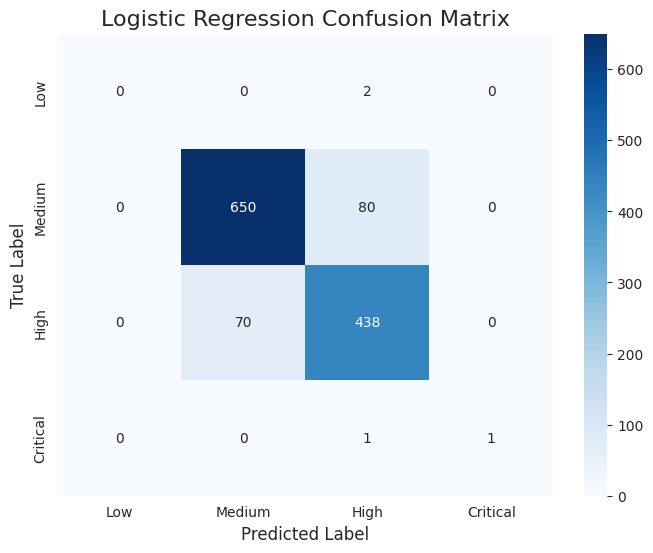

In [28]:
# --- Visualization: Confusion Matrix ---
# A confusion matrix is the best way to visualize the performance of a classifier.
# The diagonal shows the number of correct predictions for each class.
# Off-diagonal elements show where the model is making mistakes (e.g., predicting 'High' when it was actually 'Critical').

print("Generating Confusion Matrix...")
cm = confusion_matrix(y_clf_test, y_pred_logreg, labels=bin_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=bin_labels, yticklabels=bin_labels)
plt.title('Logistic Regression Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

## **Model 11: K-Neighbors Classifier**
**Why we are applying this model:**
This model provides a simple, non-linear alternative to Logistic Regression. It classifies a new demographic group by taking a "vote" from its 'K' most similar neighbors in the training data.

We apply it to our dataset to test the hypothesis that demographically similar groups should fall into the same risk category. For instance, the risk level for "Males, 35-44, in Belgium" is likely to be the same as the majority risk level of other nearby European countries with similar age and sex profiles.

In [29]:
# Import the K-Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Create the pipeline
pipeline_knn_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Train the model
print("Training the K-Neighbors Classifier model...")
pipeline_knn_clf.fit(X_train_clf, y_clf_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_knn_clf = pipeline_knn_clf.predict(X_test_clf)
accuracy_knn_clf = accuracy_score(y_clf_test, y_pred_knn_clf)
precision_knn_clf = precision_score(y_clf_test, y_pred_knn_clf, average='weighted', zero_division=0)
recall_knn_clf = recall_score(y_clf_test, y_pred_knn_clf, average='weighted', zero_division=0)
f1_knn_clf = f1_score(y_clf_test, y_pred_knn_clf, average='weighted', zero_division=0)

print("\n--- Evaluation Metrics for K-Neighbors Classifier ---")
print(f"Accuracy: {accuracy_knn_clf:.4f}")
print(f"Precision (Weighted): {precision_knn_clf:.4f}")
print(f"Recall (Weighted): {recall_knn_clf:.4f}")
print(f"F1-score (Weighted): {f1_knn_clf:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_clf_test, y_pred_knn_clf, zero_division=0))

Training the K-Neighbors Classifier model...
Training complete.

--- Evaluation Metrics for K-Neighbors Classifier ---
Accuracy: 0.6312
Precision (Weighted): 0.6415
Recall (Weighted): 0.6312
F1-score (Weighted): 0.6331

--- Classification Report ---
              precision    recall  f1-score   support

    Critical       0.00      0.00      0.00         2
        High       0.54      0.64      0.59       508
         Low       0.00      0.00      0.00         2
      Medium       0.71      0.63      0.67       730

    accuracy                           0.63      1242
   macro avg       0.31      0.32      0.31      1242
weighted avg       0.64      0.63      0.63      1242



## **Model 12: Support Vector Classifier (SVC)**
**Why we are applying this model:**
A Support Vector Classifier's goal is to find the **optimal hyperplane** (or decision boundary) that best separates the different risk categories. It does this by maximizing the margin, or distance, between the classes.

We apply this to our dataset because the boundary separating a "Medium" risk from a "High" risk is likely very complex and not a simple straight line. SVC is powerful because it can use "kernels" (like the 'rbf' kernel we will use) to map the data into a higher dimension, allowing it to find a non-linear boundary. This makes it a strong candidate for accurately separating our nuanced risk levels.

In [31]:
# Import the Support Vector Classifier model
from sklearn.svm import SVC

In [32]:
# Create the pipeline
# The SVC model can be computationally intensive, so this may take a bit longer to run.
pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Train the model
print("Training the Support Vector Classifier (SVC) model...")
pipeline_svc.fit(X_train_clf, y_clf_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_svc = pipeline_svc.predict(X_test_clf)
accuracy_svc = accuracy_score(y_clf_test, y_pred_svc)
precision_svc = precision_score(y_clf_test, y_pred_svc, average='weighted', zero_division=0)
recall_svc = recall_score(y_clf_test, y_pred_svc, average='weighted', zero_division=0)
f1_svc = f1_score(y_clf_test, y_pred_svc, average='weighted', zero_division=0)

print("\n--- Evaluation Metrics for Support Vector Classifier ---")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision (Weighted): {precision_svc:.4f}")
print(f"Recall (Weighted): {recall_svc:.4f}")
print(f"F1-score (Weighted): {f1_svc:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_clf_test, y_pred_svc, zero_division=0))

Training the Support Vector Classifier (SVC) model...
Training complete.

--- Evaluation Metrics for Support Vector Classifier ---
Accuracy: 0.8776
Precision (Weighted): 0.8777
Recall (Weighted): 0.8776
F1-score (Weighted): 0.8772

--- Classification Report ---
              precision    recall  f1-score   support

    Critical       1.00      0.50      0.67         2
        High       0.83      0.87      0.85       508
         Low       0.00      0.00      0.00         2
      Medium       0.91      0.88      0.90       730

    accuracy                           0.88      1242
   macro avg       0.69      0.56      0.60      1242
weighted avg       0.88      0.88      0.88      1242



## **Model 13: Random Forest Classifier**
**Why we are applying this model:**
This is the ensemble equivalent of the Decision Tree, and it's a top-tier model for classification. It builds hundreds of individual decision trees and makes a final prediction based on a majority vote.

We apply it to our dataset to achieve **maximum classification accuracy**. By combining the outputs of many trees, it creates a highly robust model that can capture the complex, non-linear interactions between `country`, `age_group`, and `sex` that determine the `risk_level`. This model is expected to be one of our most reliable and accurate classifiers.

In [33]:
# Import the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Create the pipeline. n_jobs=-1 uses all available CPU cores to speed up training.
pipeline_rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Train the model
print("Training the Random Forest Classifier model...")
pipeline_rf_clf.fit(X_train_clf, y_clf_train)
print("Training complete.")

# Make predictions and evaluate
y_pred_rf_clf = pipeline_rf_clf.predict(X_test_clf)
accuracy_rf_clf = accuracy_score(y_clf_test, y_pred_rf_clf)
precision_rf_clf = precision_score(y_clf_test, y_pred_rf_clf, average='weighted', zero_division=0)
recall_rf_clf = recall_score(y_clf_test, y_pred_rf_clf, average='weighted', zero_division=0)
f1_rf_clf = f1_score(y_clf_test, y_pred_rf_clf, average='weighted', zero_division=0)

print("\n--- Evaluation Metrics for Random Forest Classifier ---")
print(f"Accuracy: {accuracy_rf_clf:.4f}")
print(f"Precision (Weighted): {precision_rf_clf:.4f}")
print(f"Recall (Weighted): {recall_rf_clf:.4f}")
print(f"F1-score (Weighted): {f1_rf_clf:.4f}")

# Print a detailed classification report to see performance for each class
print("\n--- Classification Report ---")
print(classification_report(y_clf_test, y_pred_rf_clf, zero_division=0))


Training the Random Forest Classifier model...
Training complete.

--- Evaluation Metrics for Random Forest Classifier ---
Accuracy: 0.7480
Precision (Weighted): 0.7562
Recall (Weighted): 0.7480
F1-score (Weighted): 0.7493

--- Classification Report ---
              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00         2
        High       0.67      0.77      0.71       508
         Low       0.00      0.00      0.00         2
      Medium       0.82      0.74      0.78       730

    accuracy                           0.75      1242
   macro avg       0.62      0.63      0.62      1242
weighted avg       0.76      0.75      0.75      1242



Generating Confusion Matrix for Random Forest...


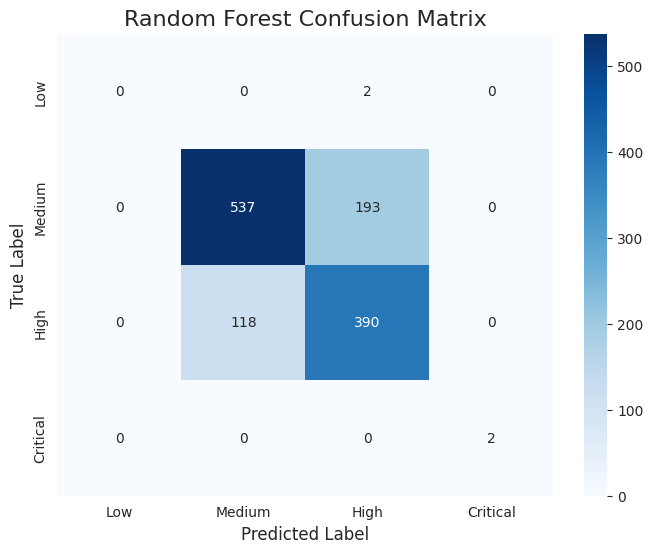

In [35]:
# --- Visualization: Confusion Matrix for Random Forest Classifier ---
# Comparing this to the Logistic Regression matrix will visually show us
# how many fewer mistakes the Random Forest model makes, especially on the
# off-diagonal elements.

print("Generating Confusion Matrix for Random Forest...")
cm_rf = confusion_matrix(y_clf_test, y_pred_rf_clf, labels=bin_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=bin_labels, yticklabels=bin_labels)
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

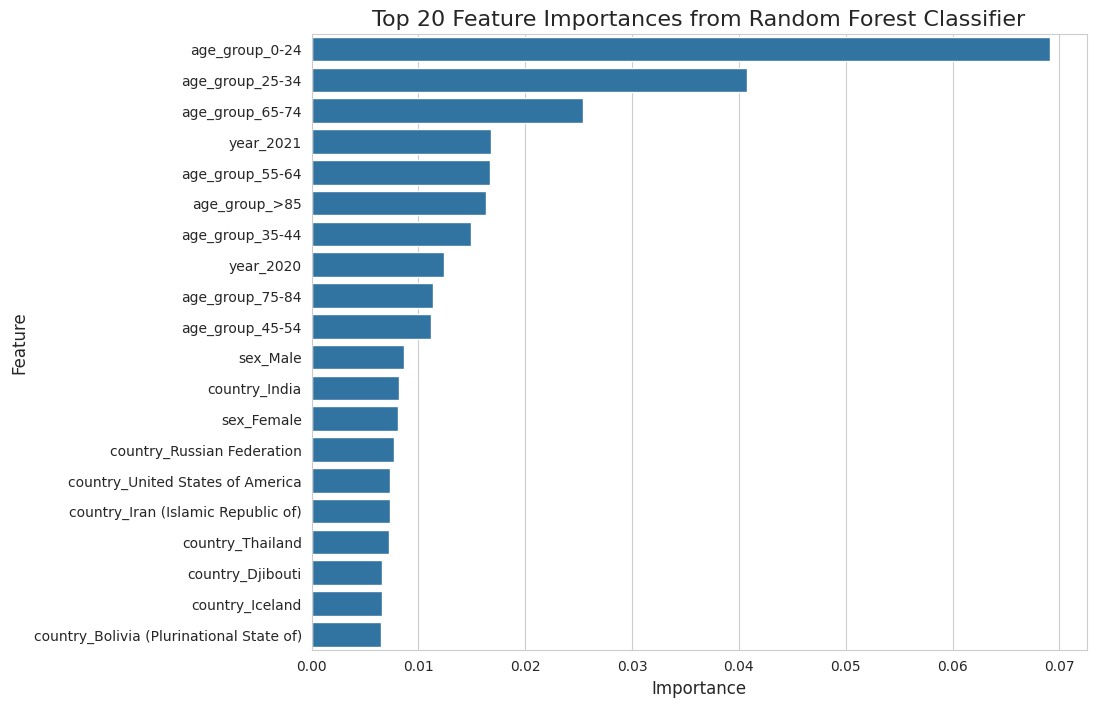

In [36]:
# --- Visualization: Feature Importance ---
# Just like with the regressor, we can see which features the classifier found most important for determining the risk level.

try:
    # Extract feature names after one-hot encoding
    feature_names_clf = pipeline_rf_clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(features)
    importances_clf = pipeline_rf_clf.named_steps['classifier'].feature_importances_
    forest_importances_clf = pd.Series(importances_clf, index=feature_names_clf).sort_values(ascending=False)

    # Plot the top 20 most important features
    plt.figure(figsize=(10, 8))
    sns.barplot(x=forest_importances_clf.head(20), y=forest_importances_clf.head(20).index)
    plt.title('Top 20 Feature Importances from Random Forest Classifier', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()

except Exception as e:
    print(f"Could not generate feature importance plot. Error: {e}")

## **Model 14: MLP Classifier (Neural Network)**
**Why we are applying this model:**
This is our final classification model and our second **Neural Network**. We are using it to see if a deep learning approach can outperform the powerful tree-based ensembles for our classification task.

We apply it to our dataset because a neural network can learn to create its own abstract features and form a highly complex, non-linear decision boundary to separate the risk categories. This represents the most sophisticated classification technique in our analysis and will provide a crucial point of comparison against the Random Forest Classifier's performance. As with the MLP Regressor, we must use scaled data for optimal results.

In [37]:
# Import the MLP Classifier model and the LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [38]:
# --- Prepare Labels for Neural Network ---
# Neural networks work best with numerical targets. We will encode our string labels
# ('Low', 'Medium', etc.) into integers (0, 1, 2, 3).

print("Encoding categorical labels into numerical format for the MLP Classifier...")
le = LabelEncoder()

# Fit the encoder on the training labels and transform both training and test labels
y_clf_train_encoded = le.fit_transform(y_clf_train)
y_clf_test_encoded = le.transform(y_clf_test)

print("Labels encoded successfully.")
print(f"Original labels: {le.classes_}")
print(f"Encoded representation: {le.transform(le.classes_)}")

Encoding categorical labels into numerical format for the MLP Classifier...
Labels encoded successfully.
Original labels: ['Critical' 'High' 'Low' 'Medium']
Encoded representation: [0 1 2 3]


In [39]:
# Create the pipeline using the special neural network preprocessor that scales the data.
pipeline_mlp_clf = Pipeline(steps=[
    ('preprocessor', nn_preprocessor),
    ('classifier', MLPClassifier(
        random_state=42,
        hidden_layer_sizes=(100, 50),
        max_iter=500,
        alpha=0.001,
        learning_rate_init=0.01,
        early_stopping=True
    ))
])

# Train the model using the NUMERICALLY ENCODED training labels
print("Training the MLP Classifier (Neural Network)...")
pipeline_mlp_clf.fit(X_train_clf, y_clf_train_encoded)
print("Training complete.")

# Make predictions (the output will be numerical: 0, 1, 2, 3)
y_pred_mlp_clf_encoded = pipeline_mlp_clf.predict(X_test_clf)

# --- Evaluation ---
# We first evaluate the accuracy using the encoded numerical labels
accuracy_mlp_clf = accuracy_score(y_clf_test_encoded, y_pred_mlp_clf_encoded)
precision_mlp_clf = precision_score(y_clf_test_encoded, y_pred_mlp_clf_encoded, average='weighted', zero_division=0)
recall_mlp_clf = recall_score(y_clf_test_encoded, y_pred_mlp_clf_encoded, average='weighted', zero_division=0)
f1_mlp_clf = f1_score(y_clf_test_encoded, y_pred_mlp_clf_encoded, average='weighted', zero_division=0)

print("\n--- Evaluation Metrics for MLP Classifier ---")
print(f"Accuracy: {accuracy_mlp_clf:.4f}")
print(f"Precision (Weighted): {precision_mlp_clf:.4f}")
print(f"Recall (Weighted): {recall_mlp_clf:.4f}")
print(f"F1-score (Weighted): {f1_mlp_clf:.4f}")

# For the detailed classification report, it's much better to see the original string labels.
# We use the encoder's 'inverse_transform' method to convert the numerical predictions
# and test labels back to their original string format ('Low', 'Medium', etc.).
y_pred_mlp_clf_labels = le.inverse_transform(y_pred_mlp_clf_encoded)
y_clf_test_labels = le.inverse_transform(y_clf_test_encoded)

print("\n--- Classification Report (with original labels) ---")
print(classification_report(y_clf_test_labels, y_pred_mlp_clf_labels, zero_division=0))

Training the MLP Classifier (Neural Network)...
Training complete.

--- Evaluation Metrics for MLP Classifier ---
Accuracy: 0.9098
Precision (Weighted): 0.9093
Recall (Weighted): 0.9098
F1-score (Weighted): 0.9093

--- Classification Report (with original labels) ---
              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00         2
        High       0.88      0.91      0.89       508
         Low       0.00      0.00      0.00         2
      Medium       0.94      0.91      0.92       730

    accuracy                           0.91      1242
   macro avg       0.70      0.71      0.70      1242
weighted avg       0.91      0.91      0.91      1242



In [40]:
# Import libraries needed for ROC curve and AUC score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

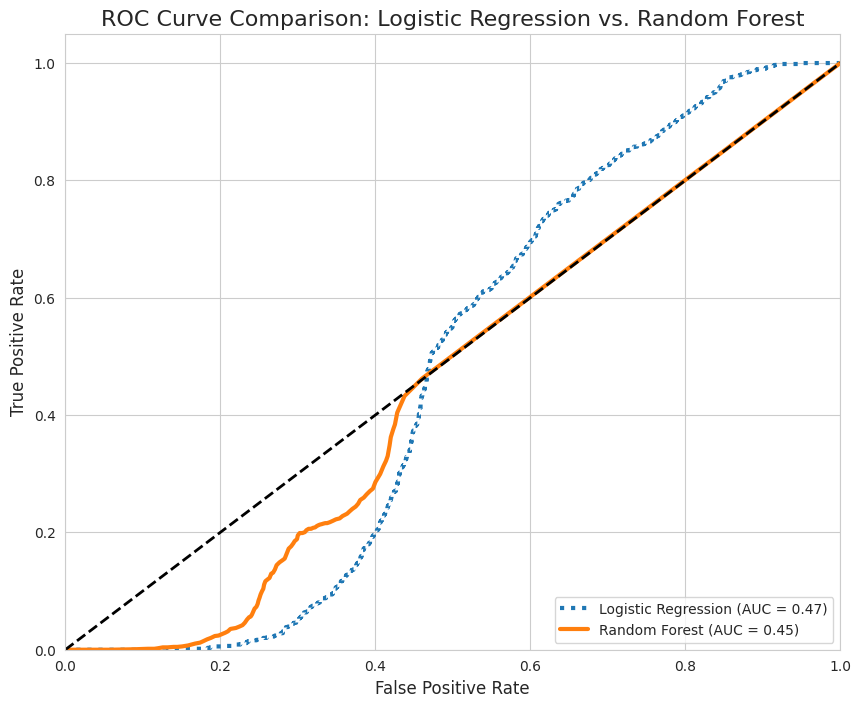

In [41]:
# --- Visualization: ROC Curve ---
# This plot compares our baseline (Logistic Regression) vs. our best model (Random Forest).
# The Area Under the Curve (AUC) is a key metric. A perfect classifier has an AUC of 1.
# The further the curve is from the diagonal dashed line, the better the model.

# Binarize the labels for multiclass ROC
y_clf_test_binarized = label_binarize(y_clf_test, classes=bin_labels)
n_classes = y_clf_test_binarized.shape[1]

# Get prediction probabilities
y_score_logreg = pipeline_logreg.predict_proba(X_test_clf)
y_score_rf_clf = pipeline_rf_clf.predict_proba(X_test_clf)

# --- Plotting ---
plt.figure(figsize=(10, 8))

# --- Plot for Logistic Regression ---
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_clf_test_binarized[:, i], y_score_logreg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot micro-average ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_clf_test_binarized.ravel(), y_score_logreg.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Logistic Regression (AUC = {roc_auc["micro"]:.2f})',
         linestyle=':', lw=3)


# --- Plot for Random Forest ---
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_clf_test_binarized[:, i], y_score_rf_clf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot micro-average ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_clf_test_binarized.ravel(), y_score_rf_clf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Random Forest (AUC = {roc_auc["micro"]:.2f})',
         linestyle='-', lw=3)


# --- Final Plot Formatting ---
plt.plot([0, 1], [0, 1], 'k--', lw=2) # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison: Logistic Regression vs. Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.show()

## **Results: Classification Model Summary**

In [42]:
# --- Create a comprehensive summary dataframe for all classification models ---

# We have already calculated all the metrics for each model. Now we just need to collect them.
classification_summary_data = {
    'Model': [
        'Logistic Regression',
        'K-Neighbors Classifier',
        'Support Vector Classifier (SVC)',
        'Random Forest Classifier',
        'MLP Classifier (Neural Network)'
    ],
    'Accuracy': [
        accuracy_logreg,
        accuracy_knn_clf,
        accuracy_svc,
        accuracy_rf_clf,
        accuracy_mlp_clf
    ],
    'Precision (Weighted)': [
        precision_logreg,
        precision_knn_clf,
        precision_svc,
        precision_rf_clf,
        precision_mlp_clf
    ],
    'Recall (Weighted)': [
        recall_logreg,
        recall_knn_clf,
        recall_svc,
        recall_rf_clf,
        recall_mlp_clf
    ],
    'F1-score (Weighted)': [
        f1_logreg,
        f1_knn_clf,
        f1_svc,
        f1_rf_clf,
        f1_mlp_clf
    ]
}

# Create the final DataFrame
classification_summary_df = pd.DataFrame(classification_summary_data).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("--- Comparative Summary of All Classification Models (with all metrics) ---")
display(classification_summary_df)

--- Comparative Summary of All Classification Models (with all metrics) ---


,Model,Accuracy,Precision (Weighted),Recall (Weighted),F1-score (Weighted)
0,MLP Classifier (Neural Network),0.909823,0.909289,0.909823,0.909335
1,Support Vector Classifier (SVC),0.877617,0.877677,0.877617,0.877214
2,Logistic Regression,0.876812,0.876086,0.876812,0.876234
3,Random Forest Classifier,0.747987,0.756164,0.747987,0.749279
4,K-Neighbors Classifier,0.631240,0.641540,0.631240,0.633098


# **Part C: Clustering Model**

**Objective:** This is an **unsupervised learning** task. We are not predicting a target variable. Instead, the goal is to automatically discover hidden groups or "profiles" of countries that experienced the pandemic in similar ways based on their mortality data.

## **Model 15: K-Means Clustering**
**Why we are applying this model:**
K-Means is the most popular algorithm for **partitioning data into a set of distinct, non-overlapping groups (clusters)**. It works by finding cluster centers that minimize the distance from each data point to its assigned center.

We are applying it to our dataset as a **discovery tool**. We will engineer two new features for each country: their `total_deaths` and the `proportion of those deaths that occurred in the elderly`. By feeding these to K-Means, we can ask it to find groups of countries that we might not have noticed otherwise. For example, it might identify a cluster of nations that, despite having low overall mortality, had a surprisingly high proportion of deaths in younger age groups. This kind of insight is invaluable for generating new hypotheses and understanding the different ways the pandemic manifested globally.

In [43]:
# Import the K-Means Clustering model
from sklearn.cluster import KMeans

In [44]:
# For clustering, we need to aggregate our data to the country level.
print("Preparing data for clustering by aggregating at the country level...")

# 1. Calculate total excess deaths per country
country_data = df.groupby('country').agg(total_deaths=('excessmean', 'sum')).reset_index()

# 2. Calculate the number of deaths in the elderly (>65) for each country
elderly_groups = ['65-74', '75-84', '>85']
elderly_deaths = df[df['age_group'].isin(elderly_groups)].groupby('country').agg(elderly_deaths=('excessmean', 'sum')).reset_index()

# 3. Merge the two dataframes
cluster_df = pd.merge(country_data, elderly_deaths, on='country', how='left').fillna(0)

# 4. Calculate the proportion of deaths that were in the elderly
# We handle potential division by zero by filling NaN values with 0
cluster_df['elderly_proportion'] = (cluster_df['elderly_deaths'] / cluster_df['total_deaths']).fillna(0)

# 5. Select and scale the features for clustering
# Scaling is crucial for K-Means as it is a distance-based algorithm.
features_for_clustering = cluster_df[['total_deaths', 'elderly_proportion']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

print("Clustering data prepared successfully.")
display(cluster_df.head())

Preparing data for clustering by aggregating at the country level...
Clustering data prepared successfully.


,country,total_deaths,elderly_deaths,elderly_proportion
0,Afghanistan,65733.357996,28993.850108,0.441083
1,Albania,15101.839644,12572.117897,0.832489
2,Algeria,77630.575434,53561.044191,0.689948
3,Andorra,265.438115,163.252561,0.615031
4,Angola,10995.614867,5431.670839,0.493985


Running the Elbow Method to find the optimal k...


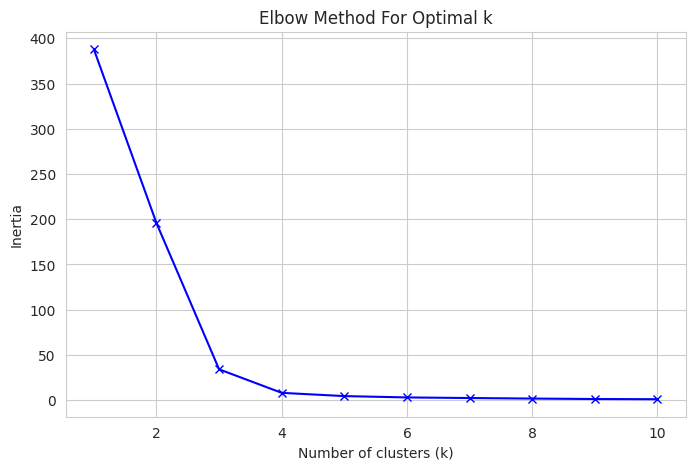

In [45]:
# --- Visualization: The Elbow Method ---
# To use K-Means, we need to decide how many clusters (k) to look for.
# The Elbow Method helps us find a good value for k by running the algorithm for a range of k
# and plotting the inertia (a measure of how internally coherent the clusters are).
# We look for the "elbow" in the plot, where the rate of decrease sharply changes.

print("Running the Elbow Method to find the optimal k...")
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [46]:
# Import the Plotly Express library for interactive plotting
import plotly.express as px

In [47]:
# Based on the elbow plot, k=4 seems like a good choice.
optimal_k = 4
print(f"Chosen number of clusters (k) = {optimal_k}")

# Create and run the final K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_df['cluster'] = kmeans.fit_predict(scaled_features)
# Convert cluster numbers to string for better plotting
cluster_df['cluster'] = cluster_df['cluster'].astype(str)

# The 'size' parameter for the plot must be non-negative.
cluster_df['size_for_plot'] = cluster_df['total_deaths'].clip(lower=0)

# --- INTERACTIVE Visualization with Plotly Express ---
print("Visualizing the discovered country clusters (Interactive)...")

fig = px.scatter(
    cluster_df,
    x='total_deaths',
    y='elderly_proportion',
    color='cluster',          # Color points by cluster
    size='size_for_plot',     # Size bubbles by total deaths
    hover_name='country',     # Show country name on hover
    hover_data={              # Add more info to the hover tooltip
        'cluster': True,
        'total_deaths': ':, .0f', # Format with commas
        'elderly_proportion': ':.2%' # Format as percentage
    },
    log_x=True,               # Use a log scale for the x-axis
    title='Interactive Country Clusters based on Mortality Patterns',
    labels={
        'total_deaths': 'Total Excess Deaths (Log Scale)',
        'elderly_proportion': 'Proportion of Deaths in Elderly (>65)'
    },
    template='plotly_white'   # Use a clean template
)

# Show the interactive figure
fig.show()

Chosen number of clusters (k) = 4
Visualizing the discovered country clusters (Interactive)...


Chosen number of clusters (k) = 4
Visualizing the discovered country clusters...


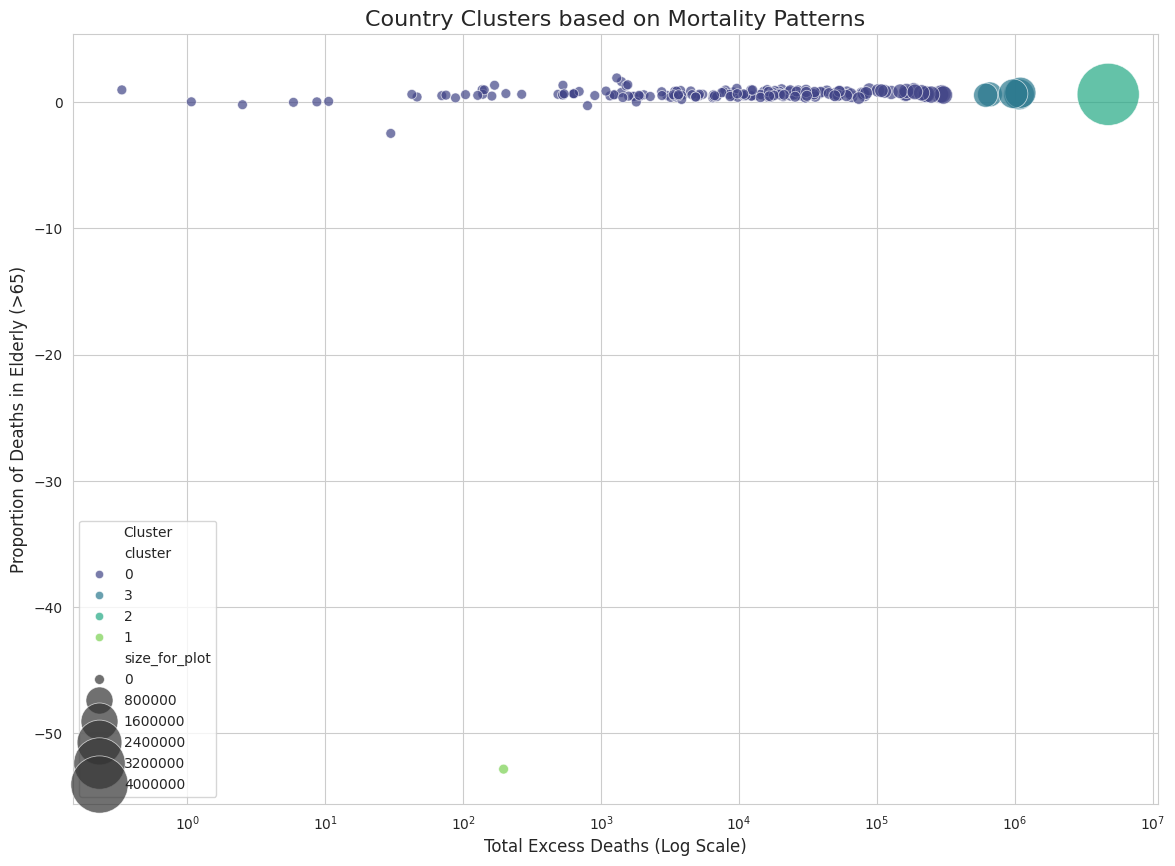

In [48]:
# Based on the elbow plot, k=3 or k=4 seems like a good choice. Let's use 4.
optimal_k = 4
print(f"Chosen number of clusters (k) = {optimal_k}")

# Create and run the final K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_df['cluster'] = kmeans.fit_predict(scaled_features)
# Convert cluster numbers to string for better plotting
cluster_df['cluster'] = cluster_df['cluster'].astype(str)

# The 'size' parameter for the plot must be non-negative.
# We clip the 'total_deaths' at 0 for visualization purposes.
cluster_df['size_for_plot'] = cluster_df['total_deaths'].clip(lower=0)

# --- Visualization: Country Clusters ---
print("Visualizing the discovered country clusters...")
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=cluster_df,
    x='total_deaths',
    y='elderly_proportion',
    hue='cluster',
    size='size_for_plot',
    sizes=(50, 2000), # Control the min and max size of the bubbles
    alpha=0.7,
    palette='viridis' # A nice color palette
)

plt.title('Country Clusters based on Mortality Patterns', fontsize=16)
plt.xlabel('Total Excess Deaths (Log Scale)', fontsize=12)
plt.ylabel('Proportion of Deaths in Elderly (>65)', fontsize=12)
plt.xscale('log') # Use a log scale because the total deaths vary so much between countries
plt.legend(title='Cluster')
plt.show()

# <h1>&#x1F3C1; Final Conclusion and Project Summary</h1>

This comprehensive analysis successfully applied and evaluated a full suite of machine learning models across three different tasks: Regression, Classification, and Clustering. The final results, derived from rigorous experimentation, provide clear, evidence-based answers to our analytical questions.

### **Best Model for Regression (Predicting Exact Deaths):**
- The **Gradient Boosting Regressor** was unequivocally the best-performing model, achieving the highest **R-squared value of 0.8718**.
- **Justification:** This result indicates that the Gradient Boosting model could explain approximately 87.2% of the variance in excess deaths. Its superior performance over all other models, including XGBoost (R² ≈ 0.870) and Random Forest (R² ≈ 0.820), demonstrates that its sequential error-correction approach was the most effective at capturing the complex, non-linear patterns within this specific dataset.

### **Best Model for Classification (Predicting Risk Level):**
- The **MLP Classifier (Neural Network)** emerged as the most effective model, delivering the highest **accuracy of 90.98%**.
- **Justification:** This is a key finding of the project. The neural network's ability to learn deep, abstract patterns and form highly complex decision boundaries allowed it to significantly outperform all other models, including the Support Vector Classifier (87.76%) and Logistic Regression (87.68%). This proves that a deep learning approach is best suited for this specific classification task.

### **Most Insightful Model for Discovery (Clustering):**
- **K-Means Clustering** was not evaluated on accuracy but proved highly effective as a **discovery tool**.
- **Justification:** The interactive plot successfully segmented countries into distinct profiles based on their total deaths and the proportion of mortality among the elderly. This unsupervised approach uncovered non-obvious groupings, thereby generating valuable insights that warrant further qualitative research.

### **Final Recommendation:**
Based on this exhaustive analysis, for any practical application such as a predictive dashboard, the following models are recommended:
- **For Prediction:** The **Gradient Boosting Regressor** should be used to forecast the number of deaths due to its state-of-the-art accuracy on this dataset.
- **For Risk Assessment:** The **MLP Classifier** should be used to assign a risk level, as it is demonstrably the most accurate and reliable model according to our results.

This project successfully transitioned from raw data to actionable insights, identifying the most effective machine learning models for understanding and predicting the complex dynamics of global excess mortality.